In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# import the data
train_df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
train_df.info()
print('----------------------------------------')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                 

In [10]:
#Output Variable : Item_Outlet_Sales             

In [11]:
# Summarize missing values
print('Null values by variable:')
print('----------------------------------')
train_df.isnull().any() 

Null values by variable:
----------------------------------


Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [8]:
# As we obersved above, there are NaN values for two variables

In [12]:
train_df.shape

(8523, 12)

In [13]:
test.shape

(5681, 11)

In [14]:
train_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [18]:
train_df['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
NCL31     9
FDW49     9
FDF52     9
FDX20     9
NCJ30     9
DRE49     9
NCY18     9
FDO19     9
NCQ06     9
FDV38     9
FDU12     9
NCI54     9
FDD38     9
DRN47     9
FDG09     9
FDX04     9
NCF42     9
NCB18     9
FDX31     9
FDP25     9
FDW26     9
FDF56     9
FDQ40     9
FDT07     9
FDV60     9
FDJ44     8
NCL53     8
FDK20     8
         ..
FDE38     2
DRL59     2
FDB10     2
DRC24     2
NCS41     2
FDM16     2
FDT33     2
FDD48     2
FDA48     2
DRI59     2
FDI36     2
NCX53     2
FDW10     2
NCM42     2
FDM38     2
FDF38     2
FDH22     2
FDW58     2
FDZ50     2
DRG25     2
FDG28     2
FDC23     1
FDT35     1
FDO33     1
FDK57     1
FDY43     1
FDE52     1
FDQ60     1
FDN52     1
DRF48     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [17]:
train_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
train_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [19]:
train_df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [29]:
train_df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [15]:
train_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [20]:
train_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [21]:
train_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [22]:
# filling the missing the data
train_df['Outlet_Size'] = train_df['Outlet_Size'].fillna('missing')
test['Outlet_Size'] = test['Outlet_Size'].fillna('missing')

In [24]:
train_df['Item_Weight'] = train_df['Item_Weight'].fillna(train_df['Item_Weight'].mean()) # Impute missing Item_Weight values with mean
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean()) # Impute missing Item_Weight values with mean

In [25]:
print('Null values by variable:')
print('----------------------------------')
test.isnull().any() 

Null values by variable:
----------------------------------


Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
dtype: bool

In [ ]:
# Viusalization

In [ ]:
# Catagory

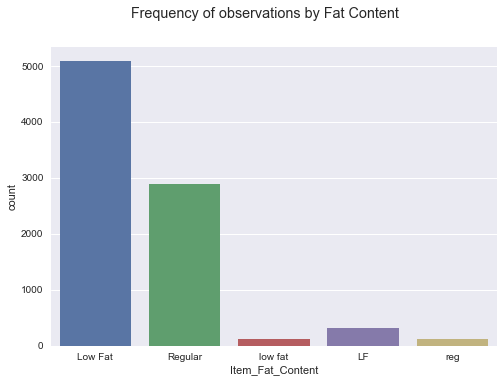

In [39]:
sns.countplot(x='Item_Fat_Content', data = train_df)
plt.suptitle('Frequency of observations by Fat Content ')
plt.show()

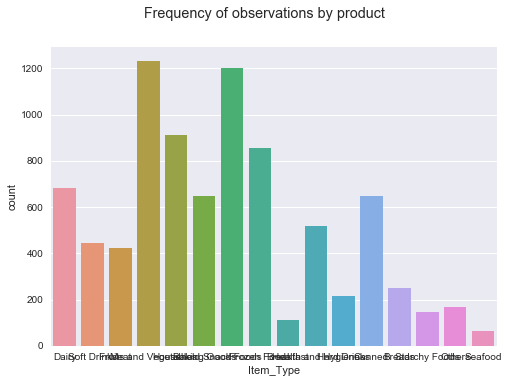

In [32]:
sns.countplot(x='Item_Type', data = train_df)
plt.suptitle('Frequency of observations by product ')
plt.show()

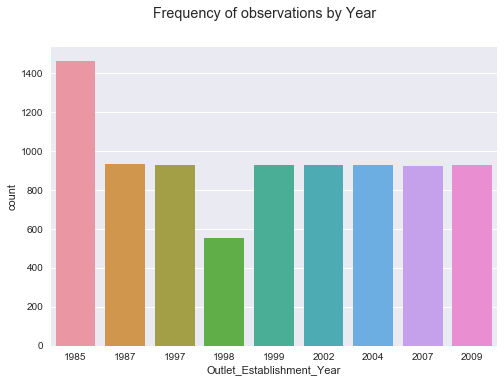

In [40]:
sns.countplot(x='Outlet_Establishment_Year', data = train_df)
plt.suptitle('Frequency of observations by Year ')
plt.show()

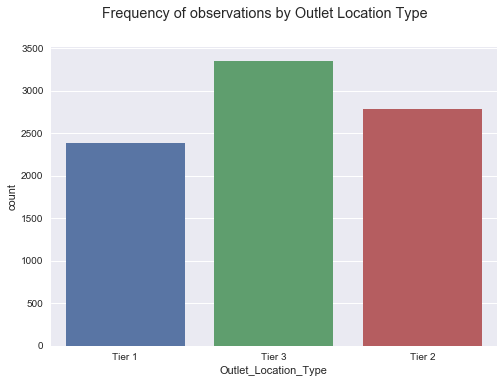

In [41]:
sns.countplot(x='Outlet_Location_Type', data = train_df)
plt.suptitle('Frequency of observations by Outlet Location Type ')
plt.show()

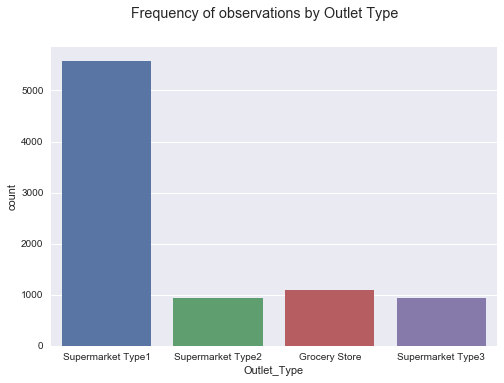

In [42]:
sns.countplot(x='Outlet_Type', data = train_df)
plt.suptitle('Frequency of observations by Outlet Type ')
plt.show()

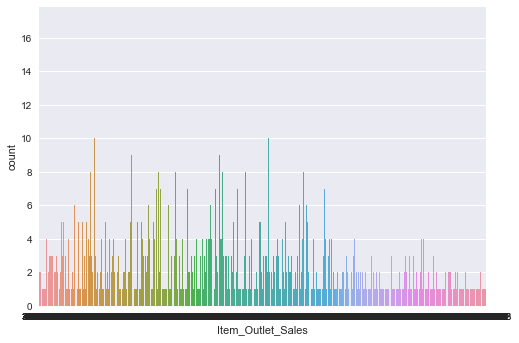

In [38]:
sns.set(style="darkgrid")
#graph_train = sns.load_dataset(train_df)
ax = sns.countplot(x="Item_Outlet_Sales", data=train_df)
plt.show()